# Taming Text

In this homework we will explore a relatively large corpus of emails released in public during the Hillary Clinton email controversy.

In [70]:
#A few dependecies are needed:
import numpy as np
import pickle

import pandas as pd
import seaborn
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

%matplotlib inline

### Loading the data:

In [11]:
data_dir = 'hillary-clinton-emails/'
filename = 'Emails.csv'
df = pd.read_csv(data_dir + filename)

In [12]:
df.head(10)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841,...,NaN,NaN,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
6,7,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>",NaN,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
7,8,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivanli@stategov>",NaN,"Wednesday, September 12, 2012 6:08 PM",F-2015-04841,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\nU.S. Department of State\nCase N...
9,10,C05739563,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739563,05/13/2015,RELEASE IN PART,"B6\nWednesday, September 12, 2012 6:16 

In [13]:
df.shape

(7945, 22)

In [14]:
df.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

We have almost 8000 interactions, with 22 features, where we can find organized information as well as the raw text for each of these emails.

In order to generate, the fields that we can use are 'ExtractedBodyText' and 'RawText'. According to schema described <a href="https://www.kaggle.com/kaggle/hillary-clinton-emails">here</a>, 'RawText' is the raw email text extracted from the PDF and 'ExtractedBodyText' is the attempt to only pull out the text in the body that the email sender wrote. Thus it makes more sense to use 'ExtractedBodyText' to generate the word cloud. The subject can also be of interest, and thus will be also taken into account in our analysis.

## Assignment 1 - Word Cloud

In [15]:
from wordcloud import WordCloud
import nltk

### 1.1 First Cloud - WordCloud Library

To create our word cloud we will consider both the 'Extracted Body' and the 'Extracted Subject'. We join these into long strings of words as the structure is not critical to word counting.

In [16]:
# Get the row text and put it into lists
body = df.dropna(subset=['ExtractedBodyText'],axis=0).ExtractedBodyText.astype('str').tolist()
subject = df.dropna(subset=['ExtractedSubject'],axis=0).ExtractedSubject.astype('str').tolist()

In [17]:
# Collapse into a long string
long_string_body = ' '.join(body)
long_string_subject = ' '.join(subject)
all_together = long_string_subject + ' ' + long_string_body

(-0.5, 399.5, 199.5, -0.5)

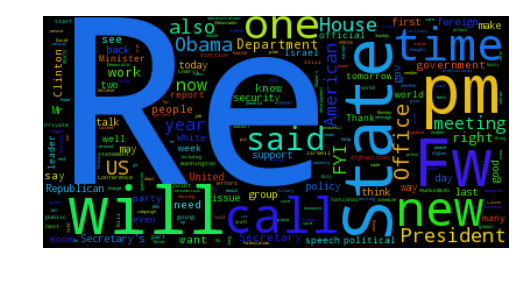

In [9]:
# Generate a word cloud image
wordcloud = WordCloud().generate(all_together)
plt.imshow(wordcloud)
plt.axis("off")

We can already see a few bad things with word cloud. It has picked up "Re" and "Fw" from the subjects, it has huge precence of not very meaninful verbs like "will" or "said"

### 1.2 Second Cloud - Pre-processing pipeline & NLTK

Now we implement our own text pre-processing pipeline:

In [10]:
#Tokenization
tokens = nltk.word_tokenize(all_together)

To "stopwords" we include some of the email typical ones that don't come with the defaults, like Re for Replay.

In [11]:
#Stopword removal
Stop = set(stopwords.words('english'))
extraStop = set(('re','fw','pm','am',"n't"))
finalStop = Stop.union(extraStop)

new_tokens = list()
for token in tokens:
    if token.lower() not in finalStop:
        new_tokens.append(token.lower())

We decided not to use stemming and use lemanization instead, which makes more sense in generating word clouds, as stemming creates words that doesn't really exist.

In [12]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemanized = [lemmatizer.lemmatize(token) for token in new_tokens]

In [13]:
all_together2 = ' '.join(lemanized)

(-0.5, 399.5, 199.5, -0.5)

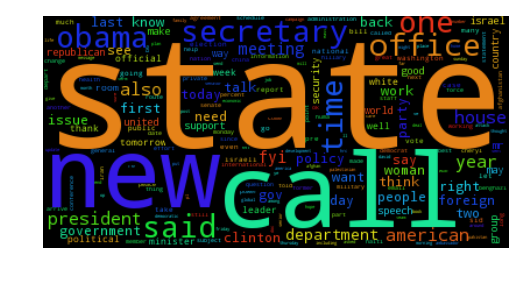

In [14]:
# Generate a word cloud image
wordcloud = WordCloud().generate(all_together2)
plt.imshow(wordcloud)
plt.axis("off")

The new final result looks much better. In fact, we don't find any disadvantages to the previous one.

## Assignment 2 - Sentiment by Country

We create a country list with the help of **pycountry**. Looping across emails and countries, if a match is found, sentiment analysis is computed with NLTK and it is added to a dataframe that keeps track of the cummulative result.
We do this twice, once for the vader Sentiment Intensity analyzer, and once more for Liu Hu's sentiment.
Finally we compare both results.

In [4]:
import pycountry
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

### Inspiration from:
### https://www.kaggle.com/operdeck/d/kaggle/hillary-clinton-emails/hillary-s-sentiment-about-countries

We print the name and alpha2 code for every country in pycountry to have a look at our exported data

In [ ]:
for country in pycountry.countries:
    print(country.name + " " + country.alpha_2)

We notice that some countries come in a form "name, extension" (like: "Iran, Islamic Republic of"). We will use this to broaden our search. Also Syria is listed as **Syrian Arab Republic** which is less likely to show up in the mails. Hence we add Syria to the list of countries. Similary for Russia , North and South Korea. These will be removed or added accordingly.

We initialize enteries for the cumulative positive and negative sentiment in entire email corpus. Also the frequency with which each country appears in positive or negative context.

In [26]:
#Creating the DataFrame
extras = [['Syria','SY'],['Russia','RU'], ['North Korea','KP'], ['South Korea','KR']]
remove = [['Korea, Republic of','KR'], ["Korea, Democratic People's Republic of",'KP']]
country_list  = list([[i.name,i.alpha_2] for i in pycountry.countries])

[country_list.remove(name) for name in remove]

country_list = country_list +  extras
country_name = np.array(country_list)[:,0]
df_countries = pd.DataFrame(country_name,columns=['Country']).set_index('Country')
df_countries['Positive'] = 0.0
df_countries['Negative'] = 0.0
df_countries['PosFrequency'] = 0
df_countries['NegFrequency'] = 0


We use pycountry lib for getting the list of the country names. Different search terms are used, like the lower case version of the name. Exceptions are added for the countries having abbreviation similar to other commonly used abbreviations. We don't expect all the abbreviation to appear (common ones are just US , UK) but we check for completion.

In [27]:
def get_countries(body):
   
    exception = ['RE','TO','NO','AM','PM', 'VA', 'LA', 'FM', 'MP'] #abbreviation which can cause conflicts with the terms used in email.
    
    countries = []
    for country in country_list:

        if ' ' + country[0].lower() + ' ' in body.lower(): #search by exact name
            countries.append(country[0])
        elif ' ' + country[0].lower().split(',',1)[0] + ' ' in body.lower(): #search by first name 
            countries.append(country[0])
        elif country[1] not in exception and ' ' + country[1] + ' '  in body:  #search by abbreviation
            countries.append(country[0])

    return countries

We define a function to update sentiments in the table. We also keep frequency of the country appearance in the mail

In [28]:
def update_feeling(scompound,df_countries,name):
    if scompound > 0.0:
        column = ['Positive', 'PosFrequency']
    else:
        column = ['Negative', 'NegFrequency']
        
    sc_old = df_countries.ix[name, column[0]]
    freq = df_countries.ix[name, column[1]]
    sc_new = sc_old + scompound
    
    df_countries2 = df_countries.set_value(name, column[0], sc_new)
    df_countries2 = df_countries.set_value(name, column[1], freq + 1)

    return df_countries2

Another function processes the sentiment table generated by keeping the countries which appear above *fthreshold* value and normalize the sentiment score with the frequency.

In [29]:
def process_sentiment_table(df_countries,fthreshold):
    interesting_countries = df_countries[df_countries.apply(lambda x:
                                                            x['PosFrequency'] > fthreshold or  x['NegFrequency'] > fthreshold, axis=1)]


    avg_pos_sentiment_countries = interesting_countries.apply(lambda x: x['Positive'] / x['PosFrequency'] , axis = 1)
    avg_neg_sentiment_countries = interesting_countries.apply(lambda x: x['Negative'] / x['NegFrequency'] , axis = 1)
    avg_sentiment = avg_pos_sentiment_countries + avg_neg_sentiment_countries
    frequency = interesting_countries['PosFrequency'] + interesting_countries['NegFrequency']

    avg_sentiment_countries = pd.concat([ avg_sentiment, frequency, avg_pos_sentiment_countries, avg_neg_sentiment_countries, interesting_countries.PosFrequency, 
                                         interesting_countries.NegFrequency],axis=1)
    avg_sentiment_countries.columns = ['Avg_Sentiment', 'Frequency', 'Avg_Pos_Sentiment','Avg_Neg_Sentiment','PosFrequency', 'NegFrequency']
    return avg_sentiment_countries


Perform line by line sentiment analysis using **Vader** and search for the country name. The table is updated with positive or negative sentiment and frequency.

In [ ]:
for indx, email in enumerate(body):
    if indx%100 == 0:
        print("Processed {}% of emails".format(round(100*indx/len(body))))
    for line in nltk.sent_tokenize(email):
        scompound = sid.polarity_scores(line)['compound']
        df_countries = update_feeling(scompound,df_countries,get_countries(line))
            
df_countries_vader = df_countries

In [31]:
#Finally save the data making a pickle dump
with open('sentiment_by_country_vader.pickle', 'wb') as handle:
    pickle.dump(df_countries_vader, handle)

Perform line by line sentiment analysis using **Liu Lexicon** and search for the country name. The table is updated with positive or negative sentiment and frequency. It takes a long while to run this loop, and some ugly fix had to be done due to liu_hu not returning values, but rather printing the results.

In [ ]:
import nltk.sentiment.util as sentiment_liu_hu
from io import StringIO
import sys


mapping = {'Positive\n':1.0,'Negative\n':-1.0,'Neutral\n':0.0}

for indx, email in enumerate(body):
    if indx%1000 == 0:
        print("Dumped {}% of emails".format(round(100*indx/len(body)))) #Intermediate dumps for security
        with open('sentiment_by_country_liu.pickle', 'wb') as handle:
            pickle.dump(df_countries, handle)
    if indx%100 == 0:
        print("Processed {}% of emails".format(round(100*indx/len(body))))
    for line in nltk.sent_tokenize(email):
        old_stdout = sys.stdout 
        sys.stdout = mystdout = StringIO() #Fix to the print2return problem. We fetch what is printed in mystdout.
    
        sentiment_liu_hu.demo_liu_hu_lexicon(line)
        sys.stdout = old_stdout
        
        scompound = mapping[mystdout.getvalue()]
        df_countries = update_feeling(scompound,df_countries,get_countries(line))
        


In [24]:
#Finally save the data making a pickle dump
print("Dumped all emails")
with open('sentiment_by_country_liu.pickle', 'wb') as handle:
    pickle.dump(df_countries, handle)

Dumped all emails


We again keep the those countries which appear above a threshold. And also normalise the score with frequency of occurance. 

In [64]:
# Cleaning
fthreshold = 5
df_countries_liu =  pickle.load(open('sentiment_by_country_liu.pickle', 'rb'))
df_countries_liu_ = df_countries_liu[df_countries_liu.apply(lambda x:
                                                            x['PosFrequency'] > fthreshold or  x['Negative'] < -fthreshold, axis=1)]

# Normalizing by freq
avg_sentiment_liu = df_countries_liu_.apply(lambda x: (x['Positive'] + x['Negative'])/(x['PosFrequency'] + x['NegFrequency']),axis=1)

#Final formating
frequency_liu = df_countries_liu_['PosFrequency'] + df_countries_liu_['NegFrequency']
df_countries_liu_ = pd.concat([ avg_sentiment_liu, frequency_liu],axis=1)
df_countries_liu_.columns = ['Avg_Sentiment', 'Frequency']

### 2.1 Viz by Country

Here we present the visualizator for the sentiment by country in our two cases of study:

**Note**: As we had processed sentiments line by line hence the result may vary with the granularity of text used for sentiment analysis.

##### 1 - Using Vader Sentiment Analyzer

In [128]:

fthreshold = 5
avg_sentiment_countries = process_sentiment_table(df_countries_vader,fthreshold)

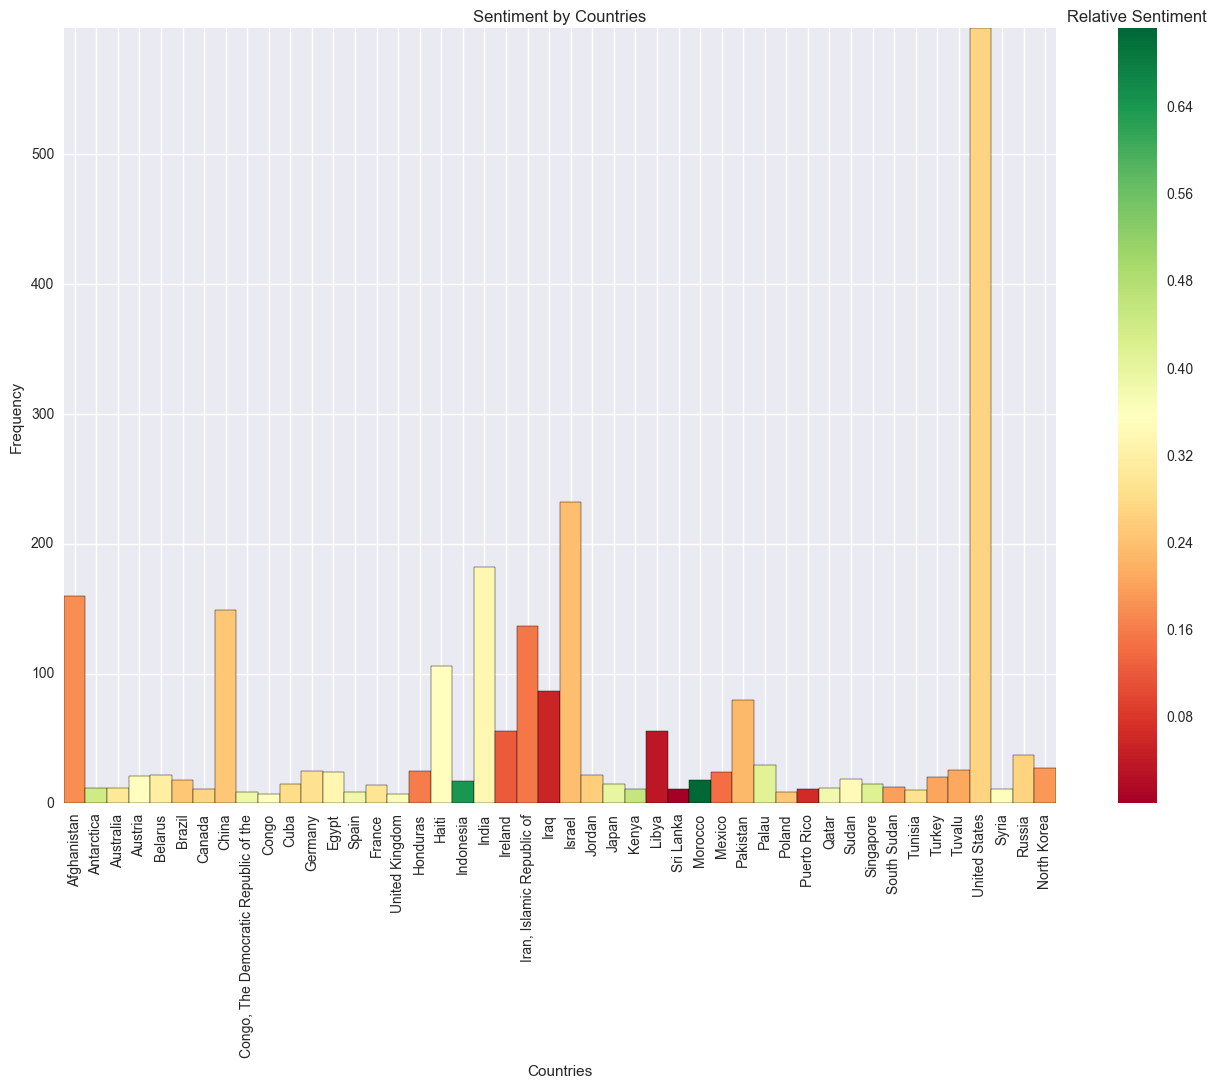

In [130]:
sentiment = np.array(avg_sentiment_countries['Avg_Sentiment'])

colors = plt.cm.RdYlGn(sentiment / float(max(sentiment) - min(sentiment)))
plt.figure(figsize=(16,10))
plot = plt.scatter(sentiment, sentiment, c=sentiment, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Relative Sentiment")



plt.bar(range(avg_sentiment_countries.shape[0]),avg_sentiment_countries['Frequency'],1.0,align='center',color = colors)
plt.xticks(range(avg_sentiment_countries.shape[0]), avg_sentiment_countries.index, rotation='vertical')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Sentiment by Countries')
plt.axis('tight')
plt.margins(0.05, 0)

##### 2 - Using Liu Lexicon based Sentiment Analyzer

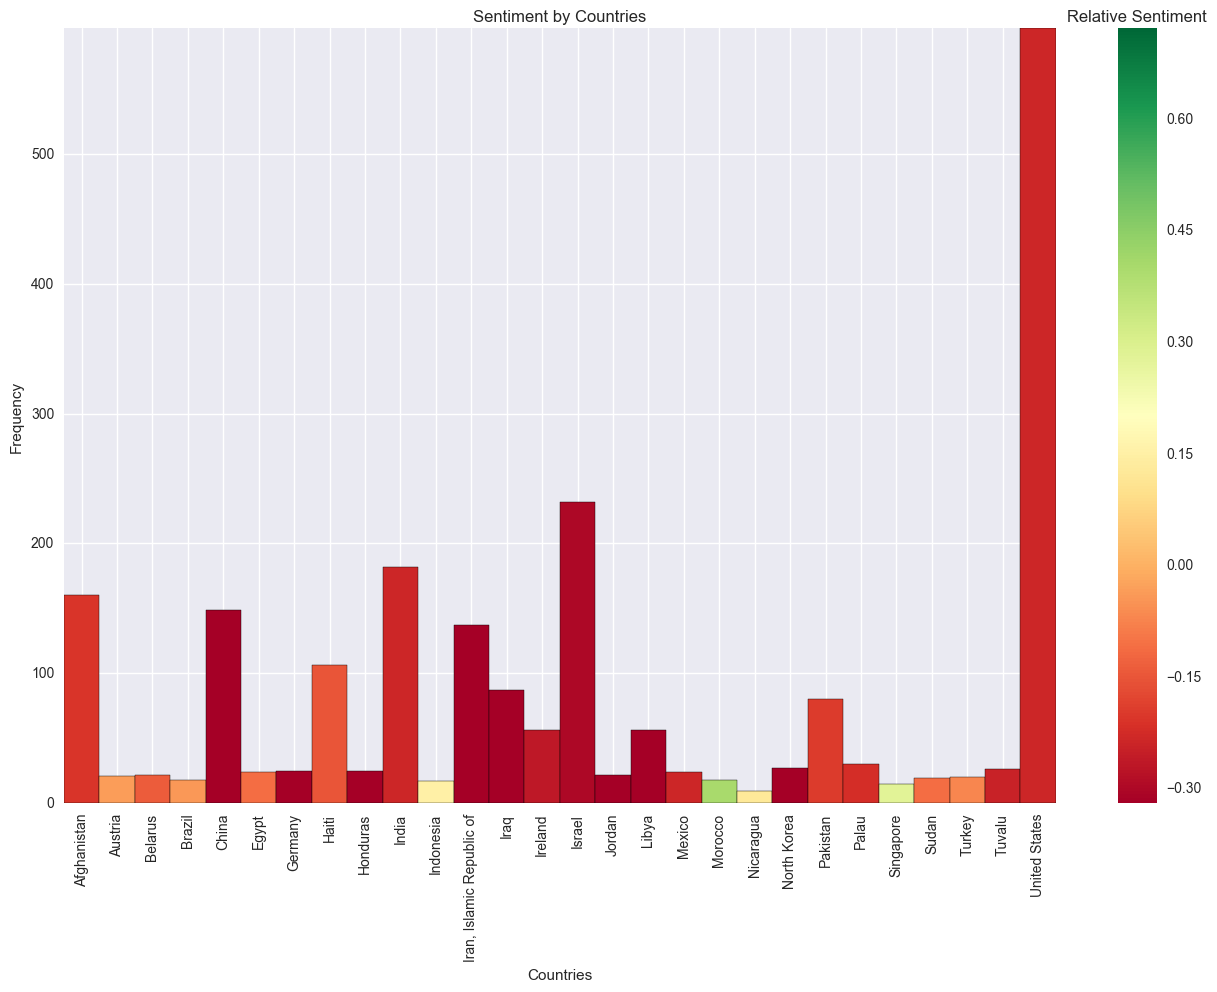

In [132]:
sentiment = np.array(df_countries_liu_['Avg_Sentiment'])
colors = plt.cm.RdYlGn(sentiment / float(max(sentiment) - min(sentiment)))
plt.figure(figsize=(16,10))
plot = plt.scatter(sentiment, sentiment, c=sentiment, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Relative Sentiment")



plt.bar(range(df_countries_liu_.shape[0]),df_countries_liu_['Frequency'],1.0,align='center',color = colors)
plt.xticks(range(df_countries_liu_.shape[0]), df_countries_liu_.index, rotation='vertical')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Sentiment by Countries')
plt.axis('tight')
plt.margins(0.05, 0)

##### Conclusions:

**The first thing to notice is that the range and meaning of the color gradient is different in both barplots.**
One of the main differences between the two is the frequency with which a country is identified to have a positive or negative feeling. We find fewer countries over our threshold frequency for our second analysis.
Other differences arise in the sentiment scores, like the case of India, that went from a rather relatively positive one in the first to relatively negative one in the second.
However, overall we find good correlations both in the positive end (Morrocco,Singapore) and in the negative end (Libya,Iraq).

## Assignment 3 - Topic Modeling

In this section, we run topic modeling over the corpus in order to determine the important content in the corpus. The library 'gensim' is used to perform this task.

In [ ]:
from gensim import corpora, models

We begin by pre-processing the text. Pre-processing involves tokenization, removal of stop words, etc.

In [67]:
# Removing numbers
import re
body = [re.sub(r'\d+', '', t) for t in body]

In [68]:
# Tokenization
tokens = [nltk.word_tokenize(doc) for doc in body]
emails = nltk.Text(tokens)

In [73]:
# Stop words removal
extra_stop = set(("fw","pm","n't","''", ",",":","...",".",";","<",">","@","[","]","(",")","-","--","//","``","h","\'s","#","?","\'","%","!"))
stops = set(stopwords.words('english')).union(extra_stop)
filtered_text = [[word for word in email if str(word).lower() not in stops] for email in emails]

We then discard words which occur only once, since these words do not play major role in topic modeling. Discard the words which are very frequent as they appear in most of the document, hence not very discrimitative. Also remove single letter words which are result of tokenisation.

In [88]:
lower_freq = 10
upper_freq = 1000

# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in filtered_text:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > lower_freq and frequency[token] < upper_freq and len(token) != 1]
         for text in filtered_text]

For this task, we consider text in each email as a single document. Since emails may involve very short sentenences, it makes sense to discard such extremely short emails.

In [89]:
min_length = 10
long_texts = [text for text in texts if len(text)>=10]

We then build a dictionary of all the words occuring in all the emails. A vector representation of each document is then generated.

In [90]:
dictionary = corpora.Dictionary(long_texts)

In [91]:
corpus = [dictionary.doc2bow(long_text) for long_text in long_texts]

At this stage, dictionary contains the list of all words, each word with an unique integer id. 'corpus' contains for each document a bag of words representation (the number of occurrences of each word).

We vary the parameter 'number of topics' and try to determine the best value for it based on the topics returned. Here we present two cases, for 5 and 15, but many more were tried out to draw our final conclusions.

In [96]:
num_topics = 5
model = models.LdaModel(corpus, num_topics, id2word=dictionary)
model.print_topics()

[(0,
  '0.016*"Office" + 0.012*"Room" + 0.011*"MEETING" + 0.011*"Department" + 0.008*"route" + 0.008*"ARRIVE" + 0.008*"DEPART" + 0.007*"Residence" + 0.007*"Private" + 0.006*"enough"'),
 (1,
  '0.005*"people" + 0.005*"work" + 0.005*"also" + 0.004*"time" + 0.004*"one" + 0.004*"like" + 0.004*"UN" + 0.003*"security" + 0.003*"U.S." + 0.003*"need"'),
 (2,
  '0.005*"Mr." + 0.005*"one" + 0.005*"David" + 0.004*"Party" + 0.004*"Koch" + 0.004*"political" + 0.004*"New" + 0.004*"House" + 0.003*"Republican" + 0.003*"told"'),
 (3,
  '0.005*"American" + 0.005*"one" + 0.004*"time" + 0.004*"like" + 0.004*"also" + 0.003*"President" + 0.003*"new" + 0.003*"Clinton" + 0.003*"know" + 0.003*"U.S."'),
 (4,
  '0.005*"U.S." + 0.004*"Cheryl" + 0.004*"call" + 0.004*"state.gov" + 0.004*"Mills" + 0.003*"people" + 0.003*"also" + 0.003*"Koch" + 0.003*"Sullivan" + 0.003*"one"')]

In [94]:
num_topics = 15
model = models.LdaModel(corpus, num_topics, id2word=dictionary)
model.print_topics()

[(0,
  '0.005*"U.S." + 0.004*"American" + 0.004*"like" + 0.004*"one" + 0.004*"also" + 0.004*"President" + 0.004*"political" + 0.003*"nuclear" + 0.003*"new" + 0.003*"diplomacy"'),
 (1,
  '0.005*"Buckley" + 0.004*"time" + 0.004*"U.S." + 0.004*"one" + 0.004*"House" + 0.004*"like" + 0.003*"think" + 0.003*"new" + 0.003*"New" + 0.003*"David"'),
 (2,
  '0.009*"Israel" + 0.005*"Israeli" + 0.004*"peace" + 0.004*"San" + 0.004*"percent" + 0.004*"U.S." + 0.004*"people" + 0.003*"like" + 0.003*"Netanyahu" + 0.003*"House"'),
 (3,
  '0.004*"American" + 0.004*"work" + 0.004*"people" + 0.004*"Koch" + 0.003*"Mr." + 0.003*"million" + 0.003*"one" + 0.003*"time" + 0.003*"think" + 0.003*"House"'),
 (4,
  '0.008*"call" + 0.006*"Office" + 0.005*"Department" + 0.004*"Washington" + 0.004*"Monday" + 0.004*"know" + 0.004*"FM" + 0.004*"see" + 0.004*"also" + 0.004*"Huma"'),
 (5,
  '0.006*"Republican" + 0.006*"also" + 0.005*"one" + 0.005*"Party" + 0.004*"people" + 0.004*"right" + 0.004*"Koch" + 0.004*"new" + 0.004*"g

##### Conclusions:

While the first one gives a more accurate overall description of the main elements in the email discussions, it fails to separate many different particular topics. All the five divisions revolve around the same politicians and so on. With a finer granularity in our second experiment we make other topics araise, like the Iran dialogue on the nuclear deal **(topic 7)**, or the Israel situaion, refereing too the israelis and their president Nentanyahu **(topic-2)**. Including more topics results in the same words being repeated across different topics. We believe that 15 topics with our given pre-processing is the best compromise.

## Communities


In this section, we attempt to determine the communities present in the email corpus. 

In [98]:
import community
import networkx as nx
import matplotlib.pyplot as plt

We start by building a communication graph between senders and recievers of each email. In order to accomplish this, we use the files 'Emails.csv' (SenderPersonId) and 'EmailReceivers.csv' (PersonId) and perform an inner join on the 'Id' attribute.

In [99]:
df1 = pd.read_csv('hillary-clinton-emails/Emails.csv', index_col='Id')
df1 = df1[df1['SenderPersonId']==df1['SenderPersonId']]

In [100]:
df2 = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv', index_col='Id')
df_network = pd.concat([df1, df2], axis=1, join="inner")
df_network[['SenderPersonId', 'PersonId']].head()

,SenderPersonId,PersonId
Id,,
1,87.0,80
3,32.0,228
4,32.0,80
5,80.0,80
6,80.0,81


The list of values of ('SenderPersonId','PersonId') will form the edge of the graph.

In [101]:
edges = list(zip(df_network['SenderPersonId'],df_network['PersonId']))
G = nx.Graph()
G.add_edges_from(edges)

We then determine the best partition using the best_partition (using Louvain algorithm) method of community module

In [110]:
#compute the best partition
partition = community.best_partition(G)


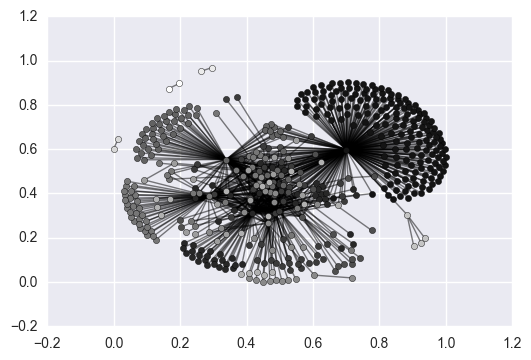

In [103]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))

nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [118]:
df_partition = pd.DataFrame([partition.keys(),partition.values()])
df_partition = df_partition.T
df_partition.columns = ['Id','Community_label']
df_partition.head()

,Id,Community_label
0,1.0,0.0
1,2.0,0.0
2,3.0,0.0
3,4.0,1.0
4,5.0,2.0
